In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, -1].values

In [39]:
#Preprocessing and encoding categorical data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Making the ANN.
import keras
from keras.models import Sequential #To initialize the neural network.
from keras.layers import Dense #To initialize the layers in our ANN.
from keras.callbacks import History

In [0]:
history = History()
epochs = [int(i) for i in range(10)]

In [47]:

#Initializing the Artificial neural network.
#Here we define the ANN as a sequence of layers.
classifier = Sequential()   #The layers will be set up step by step. Not now.

#Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6,init = 'uniform', activation = 'relu',input_dim = 11))    #To add the different layers of the neural network.
#'relu' is the name for rectifier function.

#Adding the second hidden layer.
classifier.add(Dense(units = 6, init='uniform',activation = 'relu'))

#Adding the output layer.
classifier.add(Dense(units = 1, init='uniform',activation = 'sigmoid'))

#Compiling the artificial neural network.
#'optimizer' -> To adjust the weights. 'adam'-> one of the Stochastic Gradient descent.
# binary_crossentropy -> Logarithmic loss function and for a binary outcome.
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])


#tbc = TensorBoardColab()

# Fitting classifier to the Training set
classifier.fit(X_train,y_train,
               validation_data=(X_test,y_test),
               epochs = 10,batch_size=10,
               callbacks=[history])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, activation="relu", input_dim=11, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 5s 661us/step - loss: 0.4893 - acc: 0.7954 - val_loss: 0.4289 - val_acc: 0.7975
Epoch 2/10
8000/8000 [==============================] - 5s 591us/step - loss: 0.4270 - acc: 0.7960 - val_loss: 0.4225 - val_acc: 0.7975
Epoch 3/10
8000/8000 [==============================] - 5s 592us/step - loss: 0.4223 - acc: 0.7981 - val_loss: 0.4157 - val_acc: 0.8165
Epoch 4/10
8000/8000 [==============================] - 5s 586us/step - loss: 0.4189 - acc: 0.8230 - val_loss: 0.4137 - val_acc: 0.8275
Epoch 5/10
8000/8000 [==============================] - 5s 592us/step - loss: 0.4163 - acc: 0.8266 - val_loss: 0.4114 - val_acc: 0.8330
Epoch 6/10
8000/8000 [==============================] - 5s 594us/step - loss: 0.4144 - acc: 0.8289 - val_loss: 0.4106 - val_acc: 0.8365
Epoch 7/10
8000/8000 [==============================] - 5s 592us/step - loss: 0.4126 - acc: 0.8305 - val_loss: 0.4098 - val_acc: 0.8340


In [45]:
print(history.history['val_loss'])

[0.6569395214319229, 0.557257416844368, 0.4700923725962639, 0.44180912226438523, 0.43109565824270246, 0.4263503298163414, 0.42352380603551865, 0.4211669310927391, 0.4187593534588814, 0.41632857769727705]


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


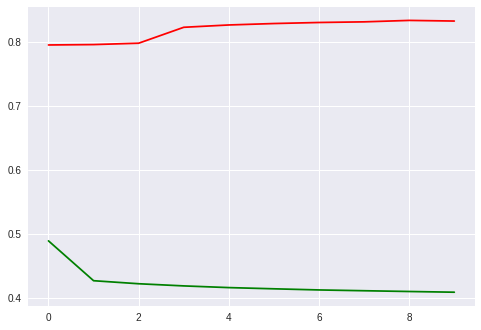

In [48]:
plt.plot(epochs,history.history['loss'],color='green')
plt.plot(epochs, history.history['acc'],color='red')
# list all data in history
print(history.history.keys())

In [49]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[1551   44]
 [ 278  127]]
